In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Transformasi Fourier & langsung invers

img value: 149
img_back pixel value: 149.00000000000003
True


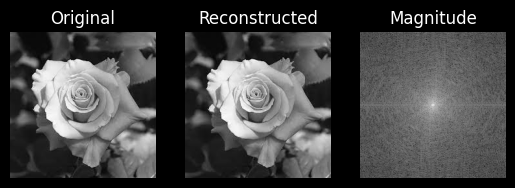

In [13]:
# Load the image
# image = cv2.imread(r'/content/drive/MyDrive/Kuliah/Semester 6/CV/CV_5 grayscale-image.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.imread('1-Rose.jpg',cv2.IMREAD_GRAYSCALE)


row, col = 150, 150
pixel_value_1 = image[row, col]
print(f"img value: {pixel_value_1}")

f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)

magnitude = 20 * np.log(np.abs(fshift))

# Inverse Transform with re-shifting the zero-frequency component
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

row, col = 150, 150
pixel_value_2 = img_back[row, col]
print(f"img_back pixel value: {pixel_value_2}")

print(np.allclose(image, img_back))

# Display the corrected result
plt.subplot(1, 3, 1), plt.imshow(image, cmap='gray')
plt.title('Original'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(img_back, cmap='gray')
plt.title('Reconstructed'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(magnitude, cmap='gray')
plt.title('Magnitude'), plt.axis('off')
plt.show()

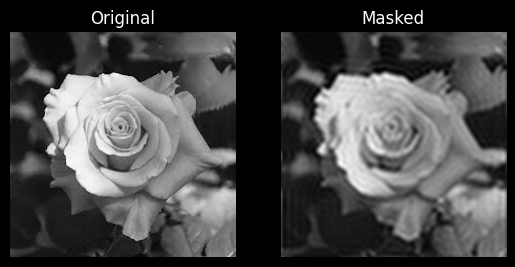

In [14]:
#High pass gambar
#Ukuran gambar
nrows, ncols = image.shape
crow, ccol = nrows // 2, ncols // 2

#mask dengan tengah 1 & sisanya 0
mask = np.zeros((nrows, ncols), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30]=1

#berikan mask terhadap fshift
fshift2=fshift*mask

f_ishift2 = np.fft.ifftshift(fshift2)
img_2 = np.fft.ifft2(f_ishift2)
img_2 = np.abs(img_2)

plt.subplot(1,2,1), plt.imshow(image, cmap='gray')
plt.title('Original'), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(img_2, cmap='gray')
plt.title('Masked'), plt.axis('off')
plt.show()

### Ideal Low pass filter

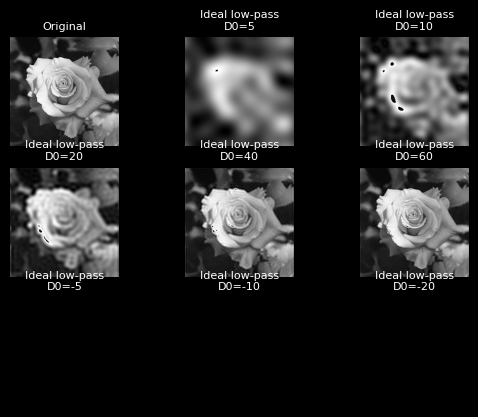

In [15]:
def ideal_low_pass_filter(rows, cols, cutoff_freq):
    """Generate an ideal low-pass filter mask."""
    mask = np.zeros((rows, cols), np.float32)
    center_row, center_col = rows // 2, cols // 2
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            if distance <= cutoff_freq:
                mask[i, j] = 1
    return mask

# Read the image
image = cv2.imread('1-Rose.jpg',cv2.IMREAD_GRAYSCALE)

# Get image dimensions
rows, cols = image.shape
# Convert image to float32 (required for Fourier transform)
image_float32 = np.float32(image)

# Perform Fourier transform
fourier_image = np.fft.fft2(image_float32)
# Shift zero frequency component to the center
fourier_image_shifted = np.fft.fftshift(fourier_image)

# Define cutoff frequency for the ideal low-pass filter
cutoff_freq = 5  # Adjust as needed
# Generate ideal low-pass filter mask
low_pass_filter = ideal_low_pass_filter(rows, cols, cutoff_freq)
# Apply the filter in the frequency domain
filtered_image_shifted = fourier_image_shifted * low_pass_filter

# Shift the result back
filtered_image = np.fft.ifftshift(filtered_image_shifted)
# Convert back to spatial domain
filtered_image_spatial = np.fft.ifft2(filtered_image)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial = np.abs(filtered_image_spatial)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8 = np.uint8(filtered_image_spatial)

# Define cutoff frequency for the ideal low-pass filter
cutoff_freq_2 = 10  # Adjust as needed
# Generate ideal low-pass filter mask
low_pass_filter_2 = ideal_low_pass_filter(rows, cols, cutoff_freq_2)
# Apply the filter in the frequency domain
filtered_image_shifted_2 = fourier_image_shifted * low_pass_filter_2

# Shift the result back
filtered_image_2 = np.fft.ifftshift(filtered_image_shifted_2)
# Convert back to spatial domain
filtered_image_spatial_2 = np.fft.ifft2(filtered_image_2)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_2 = np.abs(filtered_image_spatial_2)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_2 = np.uint8(filtered_image_spatial_2)

# Define cutoff frequency for the ideal low-pass filter
cutoff_freq_3 = 20  # Adjust as needed
# Generate ideal low-pass filter mask
low_pass_filter_3 = ideal_low_pass_filter(rows, cols, cutoff_freq_3)
# Apply the filter in the frequency domain
filtered_image_shifted_3 = fourier_image_shifted * low_pass_filter_3

# Shift the result back
filtered_image_3 = np.fft.ifftshift(filtered_image_shifted_3)
# Convert back to spatial domain
filtered_image_spatial_3 = np.fft.ifft2(filtered_image_3)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_3 = np.abs(filtered_image_spatial_3)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_3 = np.uint8(filtered_image_spatial_3)

# Define cutoff frequency for the ideal low-pass filter
cutoff_freq_4 = 40  # Adjust as needed
# Generate ideal low-pass filter mask
low_pass_filter_4 = ideal_low_pass_filter(rows, cols, cutoff_freq_4)
# Apply the filter in the frequency domain
filtered_image_shifted_4 = fourier_image_shifted * low_pass_filter_4

# Shift the result back
filtered_image_4 = np.fft.ifftshift(filtered_image_shifted_4)
# Convert back to spatial domain
filtered_image_spatial_4 = np.fft.ifft2(filtered_image_4)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_4 = np.abs(filtered_image_spatial_4)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_4 = np.uint8(filtered_image_spatial_4)

# Define cutoff frequency for the ideal low-pass filter
cutoff_freq_5 = 60  # Adjust as needed
# Generate ideal low-pass filter mask
low_pass_filter_5 = ideal_low_pass_filter(rows, cols, cutoff_freq_5)
# Apply the filter in the frequency domain
filtered_image_shifted_5 = fourier_image_shifted * low_pass_filter_5

# Shift the result back
filtered_image_5 = np.fft.ifftshift(filtered_image_shifted_5)
# Convert back to spatial domain
filtered_image_spatial_5 = np.fft.ifft2(filtered_image_5)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_5 = np.abs(filtered_image_spatial_5)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_5 = np.uint8(filtered_image_spatial_5)

# Define cutoff frequency for the ideal low-pass filter
cutoff_freq_6 = -5  # Adjust as needed
# Generate ideal low-pass filter mask
low_pass_filter_6 = ideal_low_pass_filter(rows, cols, cutoff_freq_6)
# Apply the filter in the frequency domain
filtered_image_shifted_6 = fourier_image_shifted * low_pass_filter_6

# Shift the result back
filtered_image_6 = np.fft.ifftshift(filtered_image_shifted_6)
# Convert back to spatial domain
filtered_image_spatial_6 = np.fft.ifft2(filtered_image_6)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_6 = np.abs(filtered_image_spatial_6)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_6 = np.uint8(filtered_image_spatial_6)

# Define cutoff frequency for the ideal low-pass filter
cutoff_freq_7 = -10  # Adjust as needed
# Generate ideal low-pass filter mask
low_pass_filter_7 = ideal_low_pass_filter(rows, cols, cutoff_freq_7)
# Apply the filter in the frequency domain
filtered_image_shifted_7 = fourier_image_shifted * low_pass_filter_7

# Shift the result back
filtered_image_7 = np.fft.ifftshift(filtered_image_shifted_7)
# Convert back to spatial domain
filtered_image_spatial_7 = np.fft.ifft2(filtered_image_7)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_7 = np.abs(filtered_image_spatial_7)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_7 = np.uint8(filtered_image_spatial_7)

# Define cutoff frequency for the ideal low-pass filter
cutoff_freq_8 = -20  # Adjust as needed
# Generate ideal low-pass filter mask
low_pass_filter_8 = ideal_low_pass_filter(rows, cols, cutoff_freq_8)
# Apply the filter in the frequency domain
filtered_image_shifted_8 = fourier_image_shifted * low_pass_filter_8

# Shift the result back
filtered_image_8 = np.fft.ifftshift(filtered_image_shifted_8)
# Convert back to spatial domain
filtered_image_spatial_8 = np.fft.ifft2(filtered_image_8)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_8 = np.abs(filtered_image_spatial_8)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_8 = np.uint8(filtered_image_spatial_8)

plt.subplot(3,3,1), plt.imshow(image, cmap='gray')
plt.title('Original', fontsize=8), plt.axis('off')
plt.subplot(3,3,2), plt.imshow(filtered_image_spatial_uint8, cmap='gray')
plt.title('Ideal low-pass\nD0=5', fontsize=8), plt.axis('off')
plt.subplot(3,3,3), plt.imshow(filtered_image_spatial_uint8_2, cmap='gray')
plt.title('Ideal low-pass\nD0=10', fontsize=8), plt.axis('off')
plt.subplot(3,3,4), plt.imshow(filtered_image_spatial_uint8_3, cmap='gray')
plt.title('Ideal low-pass\nD0=20', fontsize=8), plt.axis('off')
plt.subplot(3,3,5), plt.imshow(filtered_image_spatial_uint8_4, cmap='gray')
plt.title('Ideal low-pass\nD0=40', fontsize=8), plt.axis('off')
plt.subplot(3,3,6), plt.imshow(filtered_image_spatial_uint8_5, cmap='gray')
plt.title('Ideal low-pass\nD0=60', fontsize=8), plt.axis('off')
plt.subplot(3,3,7), plt.imshow(filtered_image_spatial_uint8_6, cmap='gray')
plt.title('Ideal low-pass\nD0=-5', fontsize=8), plt.axis('off')
plt.subplot(3,3,8), plt.imshow(filtered_image_spatial_uint8_7, cmap='gray')
plt.title('Ideal low-pass\nD0=-10', fontsize=8), plt.axis('off')
plt.subplot(3,3,9), plt.imshow(filtered_image_spatial_uint8_8, cmap='gray')
plt.title('Ideal low-pass\nD0=-20', fontsize=8), plt.axis('off')
plt.show()

### Low pass filter with Butterworth

In [16]:
def butterworth_low_pass_filter(rows, cols, cutoff_freq, n):
    """Generate a Butterworth low-pass filter mask."""
    mask = np.zeros((rows, cols), np.float32)
    center_row, center_col = rows // 2, cols // 2
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            mask[i, j] = 1 / (1 + (distance / cutoff_freq)**(2 * n))
    return mask

# Read the image
image = cv2.imread(r'/content/drive/MyDrive/Kuliah/Semester 6/CV/CV_5 grayscale-image.jpg', cv2.IMREAD_GRAYSCALE)

[ WARN:0@964.615] global loadsave.cpp:248 findDecoder imread_('/content/drive/MyDrive/Kuliah/Semester 6/CV/CV_5 grayscale-image.jpg'): can't open/read file: check file path/integrity


In [17]:
# Get image dimensions
rows, cols = image.shape
# Convert image to float32 (required for Fourier transform)
image_float32 = np.float32(image)

# Perform Fourier transform
fourier_image = np.fft.fft2(image_float32)
# Shift zero frequency component to the center
fourier_image_shifted = np.fft.fftshift(fourier_image)

AttributeError: 'NoneType' object has no attribute 'shape'

D0=5

/tmp/ipykernel_9464/915361345.py:8: RuntimeWarning: divide by zero encountered in scalar power
  mask[i, j] = 1 / (1 + (distance / cutoff_freq)**(2 * n))


TypeError: Image data of dtype object cannot be converted to float

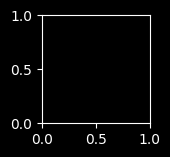

In [18]:
# Define cutoff frequency for the ideal low-pass filter
cutoff_freq_d0_5 = 5  # Adjust as needed

n = 0
# Generate ideal low-pass filter mask
low_pass_filter_d0_5 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_5, n)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_5 = fourier_image_shifted * low_pass_filter_d0_5

# Shift the result back
filtered_image_d0_5 = np.fft.ifftshift(filtered_image_shifted)
# Convert back to spatial domain
filtered_image_spatial_d0_5 = np.fft.ifft2(filtered_image_d0_5)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_5 = np.abs(filtered_image_spatial_d0_5)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_5 = np.uint8(filtered_image_spatial_d0_5)

n_2 = 1
# Generate ideal low-pass filter mask
low_pass_filter_d0_5_2 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_5, n_2)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_5_2 = fourier_image_shifted * low_pass_filter_d0_5_2

# Shift the result back
filtered_image_d0_5_2 = np.fft.ifftshift(filtered_image_shifted_d0_5_2)
# Convert back to spatial domain
filtered_image_spatial_d0_5_2 = np.fft.ifft2(filtered_image_d0_5_2)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_5_2 = np.abs(filtered_image_spatial_d0_5_2)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_5_2 = np.uint8(filtered_image_spatial_d0_5_2)

n_3 = 5
# Generate ideal low-pass filter mask
low_pass_filter_d0_5_3 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_5, n_3)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_5_3 = fourier_image_shifted * low_pass_filter_d0_5_3

# Shift the result back
filtered_image_d0_5_3 = np.fft.ifftshift(filtered_image_shifted_d0_5_3)
# Convert back to spatial domain
filtered_image_spatial_d0_5_3 = np.fft.ifft2(filtered_image_d0_5_3)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_5_3 = np.abs(filtered_image_spatial_d0_5_3)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_5_3 = np.uint8(filtered_image_spatial_d0_5_3)

n_4 = 10
# Generate ideal low-pass filter mask
low_pass_filter_d0_5_4 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_5, n_4)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_5_4 = fourier_image_shifted * low_pass_filter_d0_5_4

# Shift the result back
filtered_image_d0_5_4 = np.fft.ifftshift(filtered_image_shifted_d0_5_4)
# Convert back to spatial domain
filtered_image_spatial_d0_5_4 = np.fft.ifft2(filtered_image_d0_5_4)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_5_4 = np.abs(filtered_image_spatial_d0_5_4)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_5_4 = np.uint8(filtered_image_spatial_d0_5_4)

n_5 = 20
# Generate ideal low-pass filter mask
low_pass_filter_d0_5_5 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_5, n_5)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_5_5 = fourier_image_shifted * low_pass_filter_d0_5_5

# Shift the result back
filtered_image_d0_5_5 = np.fft.ifftshift(filtered_image_shifted_d0_5_5)
# Convert back to spatial domain
filtered_image_spatial_d0_5_5 = np.fft.ifft2(filtered_image_d0_5_5)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_5_5 = np.abs(filtered_image_spatial_d0_5_5)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_5_5 = np.uint8(filtered_image_spatial_d0_5_5)

n_6 = -5
# Generate ideal low-pass filter mask
low_pass_filter_d0_5_6 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_5, n_6)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_5_6 = fourier_image_shifted * low_pass_filter_d0_5_6

# Shift the result back
filtered_image_d0_5_6 = np.fft.ifftshift(filtered_image_shifted_d0_5_6)
# Convert back to spatial domain
filtered_image_spatial_d0_5_6 = np.fft.ifft2(filtered_image_d0_5_6)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_5_6 = np.abs(filtered_image_spatial_d0_5_6)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_5_6 = np.uint8(filtered_image_spatial_d0_5_6)

n_7 = -10
# Generate ideal low-pass filter mask
low_pass_filter_d0_5_7 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_5, n_6)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_5_7 = fourier_image_shifted * low_pass_filter_d0_5_7

# Shift the result back
filtered_image_d0_5_7 = np.fft.ifftshift(filtered_image_shifted_d0_5_7)
# Convert back to spatial domain
filtered_image_spatial_d0_5_7 = np.fft.ifft2(filtered_image_d0_5_7)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_5_7 = np.abs(filtered_image_spatial_d0_5_7)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_5_7 = np.uint8(filtered_image_spatial_d0_5_7)

n_8 = -20
# Generate ideal low-pass filter mask
low_pass_filter_d0_5_8 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_5, n_8)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_5_8 = fourier_image_shifted * low_pass_filter_d0_5_8

# Shift the result back
filtered_image_d0_5_8 = np.fft.ifftshift(filtered_image_shifted_d0_5_8)
# Convert back to spatial domain
filtered_image_spatial_d0_5_8 = np.fft.ifft2(filtered_image_d0_5_8)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_5_8 = np.abs(filtered_image_spatial_d0_5_8)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_5_8 = np.uint8(filtered_image_spatial_d0_5_8)

n_9 = -40
# Generate ideal low-pass filter mask
low_pass_filter_d0_5_9 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_5, n_9)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_5_9 = fourier_image_shifted * low_pass_filter_d0_5_9

# Shift the result back
filtered_image_d0_5_9 = np.fft.ifftshift(filtered_image_shifted_d0_5_9)
# Convert back to spatial domain
filtered_image_spatial_d0_5_9 = np.fft.ifft2(filtered_image_d0_5_9)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_5_9 = np.abs(filtered_image_spatial_d0_5_9)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_5_9 = np.uint8(filtered_image_spatial_d0_5_9)

n_10 = -60
# Generate ideal low-pass filter mask
low_pass_filter_d0_5_10 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_5, n_10)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_5_10 = fourier_image_shifted * low_pass_filter_d0_5_10

# Shift the result back
filtered_image_d0_5_10 = np.fft.ifftshift(filtered_image_shifted_d0_5_10)
# Convert back to spatial domain
filtered_image_spatial_d0_5_10 = np.fft.ifft2(filtered_image_d0_5_10)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_5_10 = np.abs(filtered_image_spatial_d0_5_10)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_5_10 = np.uint8(filtered_image_spatial_d0_5_10)

plt.subplot(3,4,1), plt.imshow(image, cmap='gray')
plt.title('Original', fontsize=8), plt.axis('off')
plt.subplot(3,4,2), plt.imshow(filtered_image_spatial_uint8, cmap='gray')
plt.title('Ideal low-pass\nD0=5', fontsize=8), plt.axis('off')
plt.subplot(3,4,3), plt.imshow(filtered_image_spatial_uint8_d0_5, cmap='gray')
plt.title('Butterworth\nD0=5, n=0', fontsize=8), plt.axis('off')
plt.subplot(3,4,4), plt.imshow(filtered_image_spatial_uint8_d0_5_2, cmap='gray')
plt.title('Butterworth\nD0=5, n=1', fontsize=8), plt.axis('off')
plt.subplot(3,4,5), plt.imshow(filtered_image_spatial_uint8_d0_5_3, cmap='gray')
plt.title('Butterworth\nD0=5, n=5', fontsize=8), plt.axis('off')
plt.subplot(3,4,6), plt.imshow(filtered_image_spatial_uint8_d0_5_4, cmap='gray')
plt.title('Butterworth\nD0=5, n=10', fontsize=8), plt.axis('off')
plt.subplot(3,4,7), plt.imshow(filtered_image_spatial_uint8_d0_5_5, cmap='gray')
plt.title('Butterworth\nD0=5, n=20', fontsize=8), plt.axis('off')
plt.subplot(3,4,8), plt.imshow(filtered_image_spatial_uint8_d0_5_6, cmap='gray')
plt.title('Butterworth\nD0=5, n=-5', fontsize=8), plt.axis('off')
plt.subplot(3,4,9), plt.imshow(filtered_image_spatial_uint8_d0_5_7, cmap='gray')
plt.title('Butterworth\nD0=5, n=-10', fontsize=8), plt.axis('off')
plt.subplot(3,4,10), plt.imshow(filtered_image_spatial_uint8_d0_5_8, cmap='gray')
plt.title('Butterworth\nD0=5, n=-20', fontsize=8), plt.axis('off')
plt.subplot(3,4,11), plt.imshow(filtered_image_spatial_uint8_d0_5_9, cmap='gray')
plt.title('Butterworth\nD0=5, n=-40', fontsize=8), plt.axis('off')
plt.subplot(3,4,12), plt.imshow(filtered_image_spatial_uint8_d0_5_10, cmap='gray')
plt.title('Butterworth\nD0=5, n=-60', fontsize=8), plt.axis('off')
plt.show()


#Jika distance=0 dan n=negatif, bisa terjadi pembagian dengan 0

D0=10

<ipython-input-14-123c18c30d1d>:8: RuntimeWarning: divide by zero encountered in scalar power
  mask[i, j] = 1 / (1 + (distance / cutoff_freq)**(2 * n))
<ipython-input-19-7ae8f07d1d01>:92: ComplexWarning: Casting complex values to real discards the imaginary part
  filtered_image_spatial_uint8_d0_10_6 = np.uint8(filtered_image_spatial_d0_10_6)


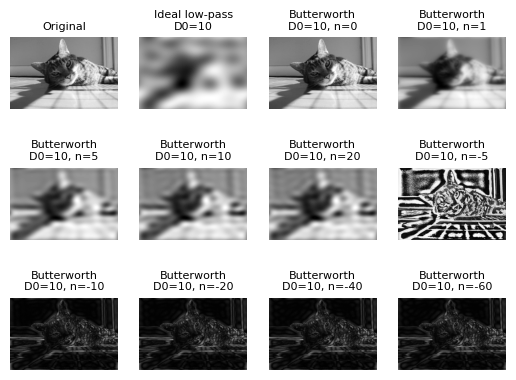

In [ ]:
# Define cutoff frequency for the ideal low-pass filter
cutoff_freq_d0_10 = 10  # Adjust as needed

n = 0
# Generate ideal low-pass filter mask
low_pass_filter_d0_10 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_10, n)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_10 = fourier_image_shifted * low_pass_filter_d0_10

# Shift the result back
filtered_image_d0_10 = np.fft.ifftshift(filtered_image_shifted_d0_10)
# Convert back to spatial domain
filtered_image_spatial_d0_10 = np.fft.ifft2(filtered_image_d0_10)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_10 = np.abs(filtered_image_spatial_d0_10)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_10 = np.uint8(filtered_image_spatial_d0_10)

n_2 = 1
# Generate ideal low-pass filter mask
low_pass_filter_d0_10_2 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_10, n_2)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_10_2 = fourier_image_shifted * low_pass_filter_d0_10_2

# Shift the result back
filtered_image_d0_10_2 = np.fft.ifftshift(filtered_image_shifted_d0_10_2)
# Convert back to spatial domain
filtered_image_spatial_d0_10_2 = np.fft.ifft2(filtered_image_d0_10_2)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_10_2 = np.abs(filtered_image_spatial_d0_10_2)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_10_2 = np.uint8(filtered_image_spatial_d0_10_2)

n_3 = 5
# Generate ideal low-pass filter mask
low_pass_filter_d0_10_3 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_10, n_3)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_10_3 = fourier_image_shifted * low_pass_filter_d0_10_3

# Shift the result back
filtered_image_d0_10_3 = np.fft.ifftshift(filtered_image_shifted_d0_10_3)
# Convert back to spatial domain
filtered_image_spatial_d0_10_3 = np.fft.ifft2(filtered_image_d0_10_3)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_10_3 = np.abs(filtered_image_spatial_d0_10_3)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_10_3 = np.uint8(filtered_image_spatial_d0_10_3)

n_4 = 10
# Generate ideal low-pass filter mask
low_pass_filter_d0_10_4 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_10, n_4)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_10_4 = fourier_image_shifted * low_pass_filter_d0_10_4

# Shift the result back
filtered_image_d0_10_4 = np.fft.ifftshift(filtered_image_shifted_d0_10_4)
# Convert back to spatial domain
filtered_image_spatial_d0_10_4 = np.fft.ifft2(filtered_image_d0_10_4)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_10_4 = np.abs(filtered_image_spatial_d0_10_4)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_10_4 = np.uint8(filtered_image_spatial_d0_10_4)

n_5 = 20
# Generate ideal low-pass filter mask
low_pass_filter_d0_10_5 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_10, n_5)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_10_5 = fourier_image_shifted * low_pass_filter_d0_10_5

# Shift the result back
filtered_image_d0_10_5 = np.fft.ifftshift(filtered_image_shifted_d0_10_5)
# Convert back to spatial domain
filtered_image_spatial_d0_10_5 = np.fft.ifft2(filtered_image_d0_10_5)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_10_5 = np.abs(filtered_image_spatial_d0_10_5)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_10_5 = np.uint8(filtered_image_spatial_d0_10_5)

n_6 = -5
# Generate ideal low-pass filter mask
low_pass_filter_d0_10_6 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_10, n_6)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_10_6 = fourier_image_shifted * low_pass_filter_d0_10_6

# Shift the result back
filtered_image_d0_10_6 = np.fft.ifftshift(filtered_image_shifted_d0_10_6)
# Convert back to spatial domain
filtered_image_spatial_d0_10_6 = np.fft.ifft2(filtered_image_d0_10_6)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_10_5 = np.abs(filtered_image_spatial_d0_10_6)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_10_6 = np.uint8(filtered_image_spatial_d0_10_6)

n_7 = -10
# Generate ideal low-pass filter mask
low_pass_filter_d0_10_7 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_10, n_7)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_10_7 = fourier_image_shifted * low_pass_filter_d0_10_7

# Shift the result back
filtered_image_d0_10_7 = np.fft.ifftshift(filtered_image_shifted_d0_10_7)
# Convert back to spatial domain
filtered_image_spatial_d0_10_7 = np.fft.ifft2(filtered_image_d0_10_7)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_10_7 = np.abs(filtered_image_spatial_d0_10_7)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_10_7 = np.uint8(filtered_image_spatial_d0_10_7)

n_8 = -20
# Generate ideal low-pass filter mask
low_pass_filter_d0_10_8 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_10, n_8)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_10_8 = fourier_image_shifted * low_pass_filter_d0_10_8

# Shift the result back
filtered_image_d0_10_8 = np.fft.ifftshift(filtered_image_shifted_d0_10_8)
# Convert back to spatial domain
filtered_image_spatial_d0_10_8 = np.fft.ifft2(filtered_image_d0_10_8)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_10_8 = np.abs(filtered_image_spatial_d0_10_8)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_10_8 = np.uint8(filtered_image_spatial_d0_10_8)

n_9 = -40
# Generate ideal low-pass filter mask
low_pass_filter_d0_10_9 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_10, n_9)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_10_9 = fourier_image_shifted * low_pass_filter_d0_10_9

# Shift the result back
filtered_image_d0_10_9 = np.fft.ifftshift(filtered_image_shifted_d0_10_9)
# Convert back to spatial domain
filtered_image_spatial_d0_10_9 = np.fft.ifft2(filtered_image_d0_10_9)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_10_9 = np.abs(filtered_image_spatial_d0_10_9)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_10_9 = np.uint8(filtered_image_spatial_d0_10_9)

n_10 = -60
# Generate ideal low-pass filter mask
low_pass_filter_d0_10_10 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_10, n_10)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_10_10 = fourier_image_shifted * low_pass_filter_d0_10_10

# Shift the result back
filtered_image_d0_10_10 = np.fft.ifftshift(filtered_image_shifted_d0_10_10)
# Convert back to spatial domain
filtered_image_spatial_d0_10_10 = np.fft.ifft2(filtered_image_d0_10_10)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_10_10 = np.abs(filtered_image_spatial_d0_10_10)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_10_10 = np.uint8(filtered_image_spatial_d0_10_10)

plt.subplot(3,4,1), plt.imshow(image, cmap='gray')
plt.title('Original', fontsize=8), plt.axis('off')
plt.subplot(3,4,2), plt.imshow(filtered_image_spatial_uint8, cmap='gray')
plt.title('Ideal low-pass\nD0=10', fontsize=8), plt.axis('off')
plt.subplot(3,4,3), plt.imshow(filtered_image_spatial_uint8_d0_10, cmap='gray')
plt.title('Butterworth\nD0=10, n=0', fontsize=8), plt.axis('off')
plt.subplot(3,4,4), plt.imshow(filtered_image_spatial_uint8_d0_10_2, cmap='gray')
plt.title('Butterworth\nD0=10, n=1', fontsize=8), plt.axis('off')
plt.subplot(3,4,5), plt.imshow(filtered_image_spatial_uint8_d0_10_3, cmap='gray')
plt.title('Butterworth\nD0=10, n=5', fontsize=8), plt.axis('off')
plt.subplot(3,4,6), plt.imshow(filtered_image_spatial_uint8_d0_10_4, cmap='gray')
plt.title('Butterworth\nD0=10, n=10', fontsize=8), plt.axis('off')
plt.subplot(3,4,7), plt.imshow(filtered_image_spatial_uint8_d0_10_5, cmap='gray')
plt.title('Butterworth\nD0=10, n=20', fontsize=8), plt.axis('off')
plt.subplot(3,4,8), plt.imshow(filtered_image_spatial_uint8_d0_10_6, cmap='gray')
plt.title('Butterworth\nD0=10, n=-5', fontsize=8), plt.axis('off')
plt.subplot(3,4,9), plt.imshow(filtered_image_spatial_uint8_d0_10_7, cmap='gray')
plt.title('Butterworth\nD0=10, n=-10', fontsize=8), plt.axis('off')
plt.subplot(3,4,10), plt.imshow(filtered_image_spatial_uint8_d0_10_8, cmap='gray')
plt.title('Butterworth\nD0=10, n=-20', fontsize=8), plt.axis('off')
plt.subplot(3,4,11), plt.imshow(filtered_image_spatial_uint8_d0_10_9, cmap='gray')
plt.title('Butterworth\nD0=10, n=-40', fontsize=8), plt.axis('off')
plt.subplot(3,4,12), plt.imshow(filtered_image_spatial_uint8_d0_10_10, cmap='gray')
plt.title('Butterworth\nD0=10, n=-60', fontsize=8), plt.axis('off')
plt.show()

#Jika distance=0 dan n=negatif, bisa terjadi pembagian dengan 0

D0=20

<ipython-input-14-123c18c30d1d>:8: RuntimeWarning: divide by zero encountered in scalar power
  mask[i, j] = 1 / (1 + (distance / cutoff_freq)**(2 * n))


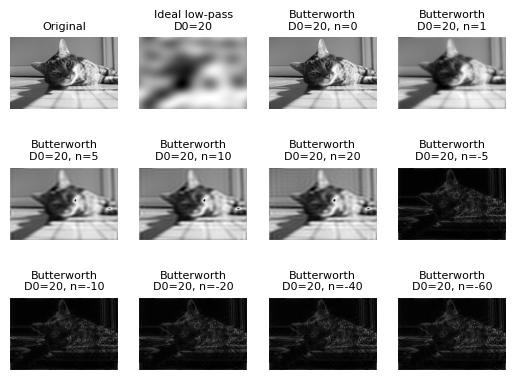

In [ ]:
# Define cutoff frequency for the ideal low-pass filter
cutoff_freq_d0_20 = 20  # Adjust as needed

n = 0
# Generate ideal low-pass filter mask
low_pass_filter_d0_20 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_20, n)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_20 = fourier_image_shifted * low_pass_filter_d0_20

# Shift the result back
filtered_image_d0_20 = np.fft.ifftshift(filtered_image_shifted_d0_20)
# Convert back to spatial domain
filtered_image_spatial_d0_20 = np.fft.ifft2(filtered_image_d0_20)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_20 = np.abs(filtered_image_spatial_d0_20)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_20 = np.uint8(filtered_image_spatial_d0_20)

n_2 = 1
# Generate ideal low-pass filter mask
low_pass_filter_d0_20_2 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_20, n_2)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_20_2 = fourier_image_shifted * low_pass_filter_d0_20_2

# Shift the result back
filtered_image_d0_20_2 = np.fft.ifftshift(filtered_image_shifted_d0_20_2)
# Convert back to spatial domain
filtered_image_spatial_d0_20_2 = np.fft.ifft2(filtered_image_d0_20_2)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_20_2 = np.abs(filtered_image_spatial_d0_20_2)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_20_2 = np.uint8(filtered_image_spatial_d0_20_2)

# Define cutoff frequency for the ideal low-pass filter
cutoff_freq_d0_20 = 20  # Adjust as needed

n = 0
# Generate ideal low-pass filter mask
low_pass_filter_d0_20 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_20, n)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_20 = fourier_image_shifted * low_pass_filter_d0_20

# Shift the result back
filtered_image_d0_20 = np.fft.ifftshift(filtered_image_shifted_d0_20)
# Convert back to spatial domain
filtered_image_spatial_d0_20 = np.fft.ifft2(filtered_image_d0_20)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_20 = np.abs(filtered_image_spatial_d0_20)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_20 = np.uint8(filtered_image_spatial_d0_20)

n_2 = 1
# Generate ideal low-pass filter mask
low_pass_filter_d0_20_2 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_20, n_2)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_20_2 = fourier_image_shifted * low_pass_filter_d0_20_2

# Shift the result back
filtered_image_d0_20_2 = np.fft.ifftshift(filtered_image_shifted_d0_20_2)
# Convert back to spatial domain
filtered_image_spatial_d0_20_2 = np.fft.ifft2(filtered_image_d0_20_2)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_20_2 = np.abs(filtered_image_spatial_d0_20_2)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_20_2 = np.uint8(filtered_image_spatial_d0_20_2)

n_3 = 5
# Generate ideal low-pass filter mask
low_pass_filter_d0_20_3 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_20, n_3)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_20_3 = fourier_image_shifted * low_pass_filter_d0_20_3

# Shift the result back
filtered_image_d0_20_3 = np.fft.ifftshift(filtered_image_shifted_d0_20_3)
# Convert back to spatial domain
filtered_image_spatial_d0_20_3 = np.fft.ifft2(filtered_image_d0_20_3)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_20_3 = np.abs(filtered_image_spatial_d0_20_3)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_20_3 = np.uint8(filtered_image_spatial_d0_20_3)

n_4 = 10
# Generate ideal low-pass filter mask
low_pass_filter_d0_20_4 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_20, n_4)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_20_4 = fourier_image_shifted * low_pass_filter_d0_20_4

# Shift the result back
filtered_image_d0_20_4 = np.fft.ifftshift(filtered_image_shifted_d0_20_4)
# Convert back to spatial domain
filtered_image_spatial_d0_20_4 = np.fft.ifft2(filtered_image_d0_20_4)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_20_4 = np.abs(filtered_image_spatial_d0_20_4)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_20_4 = np.uint8(filtered_image_spatial_d0_20_4)

n_5 = 20
# Generate ideal low-pass filter mask
low_pass_filter_d0_20_5 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_20, n_5)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_20_5 = fourier_image_shifted * low_pass_filter_d0_20_5

# Shift the result back
filtered_image_d0_20_5 = np.fft.ifftshift(filtered_image_shifted_d0_20_5)
# Convert back to spatial domain
filtered_image_spatial_d0_20_5 = np.fft.ifft2(filtered_image_d0_20_5)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_20_5 = np.abs(filtered_image_spatial_d0_20_5)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_20_5 = np.uint8(filtered_image_spatial_d0_20_5)

n_6 = -5
# Generate ideal low-pass filter mask
low_pass_filter_d0_20_6 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_20, n_6)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_20_6 = fourier_image_shifted * low_pass_filter_d0_20_6

# Shift the result back
filtered_image_d0_20_6 = np.fft.ifftshift(filtered_image_shifted_d0_20_6)
# Convert back to spatial domain
filtered_image_spatial_d0_20_6 = np.fft.ifft2(filtered_image_d0_20_6)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_20_6 = np.abs(filtered_image_spatial_d0_20_6)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_20_6 = np.uint8(filtered_image_spatial_d0_20_6)

n_7 = -10
# Generate ideal low-pass filter mask
low_pass_filter_d0_20_7 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_20, n_7)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_20_7 = fourier_image_shifted * low_pass_filter_d0_20_7

# Shift the result back
filtered_image_d0_20_7 = np.fft.ifftshift(filtered_image_shifted_d0_20_7)
# Convert back to spatial domain
filtered_image_spatial_d0_20_7 = np.fft.ifft2(filtered_image_d0_20_7)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_20_7 = np.abs(filtered_image_spatial_d0_20_7)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_20_7 = np.uint8(filtered_image_spatial_d0_20_7)

n_8 = -20
# Generate ideal low-pass filter mask
low_pass_filter_d0_20_8 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_20, n_8)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_20_8 = fourier_image_shifted * low_pass_filter_d0_20_8

# Shift the result back
filtered_image_d0_20_8 = np.fft.ifftshift(filtered_image_shifted_d0_20_8)
# Convert back to spatial domain
filtered_image_spatial_d0_20_8 = np.fft.ifft2(filtered_image_d0_20_8)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_20_8 = np.abs(filtered_image_spatial_d0_20_8)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_20_8 = np.uint8(filtered_image_spatial_d0_20_8)

n_9 = -40
# Generate ideal low-pass filter mask
low_pass_filter_d0_20_9 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_20, n_9)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_20_9 = fourier_image_shifted * low_pass_filter_d0_20_9

# Shift the result back
filtered_image_d0_20_9 = np.fft.ifftshift(filtered_image_shifted_d0_20_9)
# Convert back to spatial domain
filtered_image_spatial_d0_20_9 = np.fft.ifft2(filtered_image_d0_20_9)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_20_9 = np.abs(filtered_image_spatial_d0_20_9)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_20_9 = np.uint8(filtered_image_spatial_d0_20_9)

n_10 = -60
# Generate ideal low-pass filter mask
low_pass_filter_d0_20_10 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_20, n_10)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_20_10 = fourier_image_shifted * low_pass_filter_d0_20_10

# Shift the result back
filtered_image_d0_20_10 = np.fft.ifftshift(filtered_image_shifted_d0_20_10)
# Convert back to spatial domain
filtered_image_spatial_d0_20_10 = np.fft.ifft2(filtered_image_d0_20_10)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_20_10 = np.abs(filtered_image_spatial_d0_20_10)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_20_10 = np.uint8(filtered_image_spatial_d0_20_10)

plt.subplot(3,4,1), plt.imshow(image, cmap='gray')
plt.title('Original', fontsize=8), plt.axis('off')
plt.subplot(3,4,2), plt.imshow(filtered_image_spatial_uint8, cmap='gray')
plt.title('Ideal low-pass\nD0=20', fontsize=8), plt.axis('off')
plt.subplot(3,4,3), plt.imshow(filtered_image_spatial_uint8_d0_20, cmap='gray')
plt.title('Butterworth\nD0=20, n=0', fontsize=8), plt.axis('off')
plt.subplot(3,4,4), plt.imshow(filtered_image_spatial_uint8_d0_20_2, cmap='gray')
plt.title('Butterworth\nD0=20, n=1', fontsize=8), plt.axis('off')
plt.subplot(3,4,5), plt.imshow(filtered_image_spatial_uint8_d0_20_3, cmap='gray')
plt.title('Butterworth\nD0=20, n=5', fontsize=8), plt.axis('off')
plt.subplot(3,4,6), plt.imshow(filtered_image_spatial_uint8_d0_20_4, cmap='gray')
plt.title('Butterworth\nD0=20, n=10', fontsize=8), plt.axis('off')
plt.subplot(3,4,7), plt.imshow(filtered_image_spatial_uint8_d0_20_5, cmap='gray')
plt.title('Butterworth\nD0=20, n=20', fontsize=8), plt.axis('off')
plt.subplot(3,4,8), plt.imshow(filtered_image_spatial_uint8_d0_20_6, cmap='gray')
plt.title('Butterworth\nD0=20, n=-5', fontsize=8), plt.axis('off')
plt.subplot(3,4,9), plt.imshow(filtered_image_spatial_uint8_d0_20_7, cmap='gray')
plt.title('Butterworth\nD0=20, n=-10', fontsize=8), plt.axis('off')
plt.subplot(3,4,10), plt.imshow(filtered_image_spatial_uint8_d0_20_8, cmap='gray')
plt.title('Butterworth\nD0=20, n=-20', fontsize=8), plt.axis('off')
plt.subplot(3,4,11), plt.imshow(filtered_image_spatial_uint8_d0_20_9, cmap='gray')
plt.title('Butterworth\nD0=20, n=-40', fontsize=8), plt.axis('off')
plt.subplot(3,4,12), plt.imshow(filtered_image_spatial_uint8_d0_20_10, cmap='gray')
plt.title('Butterworth\nD0=20, n=-60', fontsize=8), plt.axis('off')
plt.show()

#Jika distance=0 dan n=negatif, bisa terjadi pembagian dengan 0

D0=40

<ipython-input-14-123c18c30d1d>:8: RuntimeWarning: divide by zero encountered in scalar power
  mask[i, j] = 1 / (1 + (distance / cutoff_freq)**(2 * n))


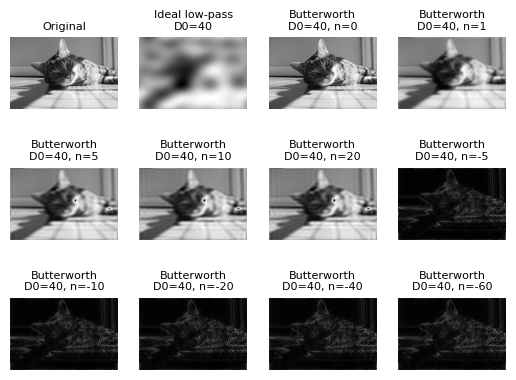

In [ ]:
# Define cutoff frequency for the ideal low-pass filter
cutoff_freq_d0_40 = 20  # Adjust as needed

n = 0
# Generate ideal low-pass filter mask
low_pass_filter_d0_40 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_40, n)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_40 = fourier_image_shifted * low_pass_filter_d0_40

# Shift the result back
filtered_image_d0_40 = np.fft.ifftshift(filtered_image_shifted_d0_40)
# Convert back to spatial domain
filtered_image_spatial_d0_40 = np.fft.ifft2(filtered_image_d0_40)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_40 = np.abs(filtered_image_spatial_d0_40)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_40 = np.uint8(filtered_image_spatial_d0_40)

n_2 = 1
# Generate ideal low-pass filter mask
low_pass_filter_d0_40_2 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_40, n_2)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_40_2 = fourier_image_shifted * low_pass_filter_d0_40_2

# Shift the result back
filtered_image_d0_40_2 = np.fft.ifftshift(filtered_image_shifted_d0_40_2)
# Convert back to spatial domain
filtered_image_spatial_d0_40_2 = np.fft.ifft2(filtered_image_d0_40_2)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_40_2 = np.abs(filtered_image_spatial_d0_40_2)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_40_2 = np.uint8(filtered_image_spatial_d0_40_2)

# Define cutoff frequency for the ideal low-pass filter
cutoff_freq_d0_40 = 20  # Adjust as needed

n = 0
# Generate ideal low-pass filter mask
low_pass_filter_d0_40 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_40, n)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_40 = fourier_image_shifted * low_pass_filter_d0_40

# Shift the result back
filtered_image_d0_40 = np.fft.ifftshift(filtered_image_shifted_d0_40)
# Convert back to spatial domain
filtered_image_spatial_d0_40 = np.fft.ifft2(filtered_image_d0_40)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_40 = np.abs(filtered_image_spatial_d0_40)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_40 = np.uint8(filtered_image_spatial_d0_40)

n_2 = 1
# Generate ideal low-pass filter mask
low_pass_filter_d0_40_2 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_40, n_2)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_40_2 = fourier_image_shifted * low_pass_filter_d0_40_2

# Shift the result back
filtered_image_d0_40_2 = np.fft.ifftshift(filtered_image_shifted_d0_40_2)
# Convert back to spatial domain
filtered_image_spatial_d0_40_2 = np.fft.ifft2(filtered_image_d0_40_2)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_40_2 = np.abs(filtered_image_spatial_d0_40_2)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_40_2 = np.uint8(filtered_image_spatial_d0_40_2)

n_3 = 5
# Generate ideal low-pass filter mask
low_pass_filter_d0_40_3 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_40, n_3)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_40_3 = fourier_image_shifted * low_pass_filter_d0_40_3

# Shift the result back
filtered_image_d0_40_3 = np.fft.ifftshift(filtered_image_shifted_d0_40_3)
# Convert back to spatial domain
filtered_image_spatial_d0_40_3 = np.fft.ifft2(filtered_image_d0_40_3)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_40_3 = np.abs(filtered_image_spatial_d0_40_3)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_40_3 = np.uint8(filtered_image_spatial_d0_40_3)

n_4 = 10
# Generate ideal low-pass filter mask
low_pass_filter_d0_40_4 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_40, n_4)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_40_4 = fourier_image_shifted * low_pass_filter_d0_40_4

# Shift the result back
filtered_image_d0_40_4 = np.fft.ifftshift(filtered_image_shifted_d0_40_4)
# Convert back to spatial domain
filtered_image_spatial_d0_40_4 = np.fft.ifft2(filtered_image_d0_40_4)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_40_4 = np.abs(filtered_image_spatial_d0_40_4)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_40_4 = np.uint8(filtered_image_spatial_d0_40_4)

n_5 = 20
# Generate ideal low-pass filter mask
low_pass_filter_d0_40_5 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_40, n_5)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_40_5 = fourier_image_shifted * low_pass_filter_d0_40_5

# Shift the result back
filtered_image_d0_40_5 = np.fft.ifftshift(filtered_image_shifted_d0_40_5)
# Convert back to spatial domain
filtered_image_spatial_d0_40_5 = np.fft.ifft2(filtered_image_d0_40_5)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_40_5 = np.abs(filtered_image_spatial_d0_40_5)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_40_5 = np.uint8(filtered_image_spatial_d0_40_5)

n_6 = -5
# Generate ideal low-pass filter mask
low_pass_filter_d0_40_6 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_40, n_6)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_40_6 = fourier_image_shifted * low_pass_filter_d0_40_6

# Shift the result back
filtered_image_d0_40_6 = np.fft.ifftshift(filtered_image_shifted_d0_40_6)
# Convert back to spatial domain
filtered_image_spatial_d0_40_6 = np.fft.ifft2(filtered_image_d0_40_6)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_40_6 = np.abs(filtered_image_spatial_d0_40_6)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_40_6 = np.uint8(filtered_image_spatial_d0_40_6)

n_7 = -10
# Generate ideal low-pass filter mask
low_pass_filter_d0_40_7 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_40, n_7)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_40_7 = fourier_image_shifted * low_pass_filter_d0_40_7

# Shift the result back
filtered_image_d0_40_7 = np.fft.ifftshift(filtered_image_shifted_d0_40_7)
# Convert back to spatial domain
filtered_image_spatial_d0_40_7 = np.fft.ifft2(filtered_image_d0_40_7)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_40_7 = np.abs(filtered_image_spatial_d0_40_7)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_40_7 = np.uint8(filtered_image_spatial_d0_40_7)

n_8 = -20
# Generate ideal low-pass filter mask
low_pass_filter_d0_40_8 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_40, n_8)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_40_8 = fourier_image_shifted * low_pass_filter_d0_40_8

# Shift the result back
filtered_image_d0_40_8 = np.fft.ifftshift(filtered_image_shifted_d0_40_8)
# Convert back to spatial domain
filtered_image_spatial_d0_40_8 = np.fft.ifft2(filtered_image_d0_40_8)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_40_8 = np.abs(filtered_image_spatial_d0_40_8)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_40_8 = np.uint8(filtered_image_spatial_d0_40_8)

n_9 = -40
# Generate ideal low-pass filter mask
low_pass_filter_d0_40_9 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_40, n_9)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_40_9 = fourier_image_shifted * low_pass_filter_d0_40_9

# Shift the result back
filtered_image_d0_40_9 = np.fft.ifftshift(filtered_image_shifted_d0_40_9)
# Convert back to spatial domain
filtered_image_spatial_d0_40_9 = np.fft.ifft2(filtered_image_d0_40_9)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_40_9 = np.abs(filtered_image_spatial_d0_40_9)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_40_9 = np.uint8(filtered_image_spatial_d0_40_9)

n_10 = -60
# Generate ideal low-pass filter mask
low_pass_filter_d0_40_10 = butterworth_low_pass_filter(rows, cols, cutoff_freq_d0_40, n_10)
# Apply the filter in the frequency domain
filtered_image_shifted_d0_40_10 = fourier_image_shifted * low_pass_filter_d0_40_10

# Shift the result back
filtered_image_d0_40_10 = np.fft.ifftshift(filtered_image_shifted_d0_40_10)
# Convert back to spatial domain
filtered_image_spatial_d0_40_10 = np.fft.ifft2(filtered_image_d0_40_10)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_d0_40_10 = np.abs(filtered_image_spatial_d0_40_10)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_d0_40_10 = np.uint8(filtered_image_spatial_d0_40_10)

plt.subplot(3,4,1), plt.imshow(image, cmap='gray')
plt.title('Original', fontsize=8), plt.axis('off')
plt.subplot(3,4,2), plt.imshow(filtered_image_spatial_uint8, cmap='gray')
plt.title('Ideal low-pass\nD0=40', fontsize=8), plt.axis('off')
plt.subplot(3,4,3), plt.imshow(filtered_image_spatial_uint8_d0_40, cmap='gray')
plt.title('Butterworth\nD0=40, n=0', fontsize=8), plt.axis('off')
plt.subplot(3,4,4), plt.imshow(filtered_image_spatial_uint8_d0_40_2, cmap='gray')
plt.title('Butterworth\nD0=40, n=1', fontsize=8), plt.axis('off')
plt.subplot(3,4,5), plt.imshow(filtered_image_spatial_uint8_d0_40_3, cmap='gray')
plt.title('Butterworth\nD0=40, n=5', fontsize=8), plt.axis('off')
plt.subplot(3,4,6), plt.imshow(filtered_image_spatial_uint8_d0_40_4, cmap='gray')
plt.title('Butterworth\nD0=40, n=10', fontsize=8), plt.axis('off')
plt.subplot(3,4,7), plt.imshow(filtered_image_spatial_uint8_d0_40_5, cmap='gray')
plt.title('Butterworth\nD0=40, n=20', fontsize=8), plt.axis('off')
plt.subplot(3,4,8), plt.imshow(filtered_image_spatial_uint8_d0_40_6, cmap='gray')
plt.title('Butterworth\nD0=40, n=-5', fontsize=8), plt.axis('off')
plt.subplot(3,4,9), plt.imshow(filtered_image_spatial_uint8_d0_40_7, cmap='gray')
plt.title('Butterworth\nD0=40, n=-10', fontsize=8), plt.axis('off')
plt.subplot(3,4,10), plt.imshow(filtered_image_spatial_uint8_d0_40_8, cmap='gray')
plt.title('Butterworth\nD0=40, n=-20', fontsize=8), plt.axis('off')
plt.subplot(3,4,11), plt.imshow(filtered_image_spatial_uint8_d0_40_9, cmap='gray')
plt.title('Butterworth\nD0=40, n=-40', fontsize=8), plt.axis('off')
plt.subplot(3,4,12), plt.imshow(filtered_image_spatial_uint8_d0_40_10, cmap='gray')
plt.title('Butterworth\nD0=40, n=-60', fontsize=8), plt.axis('off')
plt.show()

#Jika distance=0 dan n=negatif, bisa terjadi pembagian dengan 0

### Ideal High pass filter

In [19]:
def ideal_high_pass_filter(rows, cols, cutoff_freq):
    """Generate an ideal high-pass filter mask."""
    mask = np.ones((rows, cols), np.float32)
    center_row, center_col = rows // 2, cols // 2
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)
            if distance <= cutoff_freq:
                mask[i, j] = 0
    return mask

In [21]:
# Read the image
image = cv2.imread('1-Rose.jpg', cv2.IMREAD_GRAYSCALE)
# Get image dimensions
rows, cols = image.shape
# Convert image to float32 (required for Fourier transform)
image_float32 = np.float32(image)

# Perform Fourier transform
fourier_image = np.fft.fft2(image_float32)
# Shift zero frequency component to the center
fourier_image_shifted = np.fft.fftshift(fourier_image)


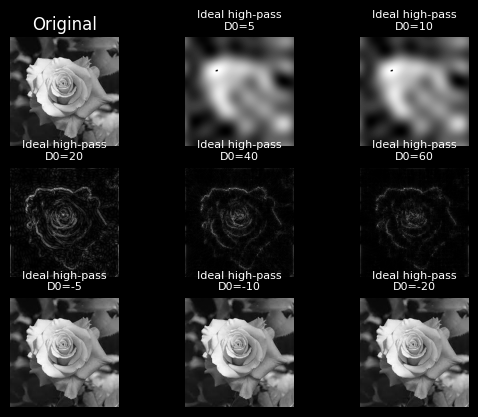

In [22]:
# Shift the result back
filtered_image_high_1 = np.fft.ifftshift(filtered_image_shifted)
# Convert back to spatial domain
filtered_image_spatial_high_1 = np.fft.ifft2(filtered_image_high_1)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_1 = np.abs(filtered_image_spatial_high_1)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_1 = np.uint8(filtered_image_spatial_high_1)

# Define cutoff frequency for the ideal low-pass filter
cutoff_freq = 5  # Adjust as needed
# Generate ideal low-pass filter mask
low_pass_filter = ideal_low_pass_filter(rows, cols, cutoff_freq)
# Apply the filter in the frequency domain
filtered_image_shifted_high_2 = fourier_image_shifted * low_pass_filter

# Shift the result back
filtered_image_high_2 = np.fft.ifftshift(filtered_image_shifted_high_2)
# Convert back to spatial domain
filtered_image_spatial_high_2 = np.fft.ifft2(filtered_image_high_2)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_2 = np.abs(filtered_image_spatial_high_2)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_2 = np.uint8(filtered_image_spatial_high_2)

# Define cutoff frequency for the ideal high-pass filter
cutoff_freq_high_3 = 20  # Adjust as needed
# Generate ideal high-pass filter mask
high_pass_filter_high_3 = ideal_high_pass_filter(rows, cols, cutoff_freq_high_3)
# Apply the filter in the frequency domain
filtered_image_shifted_high_3 = fourier_image_shifted * high_pass_filter_high_3

# Shift the result back
filtered_image_high_3 = np.fft.ifftshift(filtered_image_shifted_high_3)
# Convert back to spatial domain
filtered_image_spatial_high_3 = np.fft.ifft2(filtered_image_high_3)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_3 = np.abs(filtered_image_spatial_high_3)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_3 = np.uint8(filtered_image_spatial_high_3)

# Define cutoff frequency for the ideal high-pass filter
cutoff_freq_high_4 = 40  # Adjust as needed
# Generate ideal high-pass filter mask
high_pass_filter_high_4 = ideal_high_pass_filter(rows, cols, cutoff_freq_high_4)
# Apply the filter in the frequency domain
filtered_image_shifted_high_4 = fourier_image_shifted * high_pass_filter_high_4

# Shift the result back
filtered_image_high_4 = np.fft.ifftshift(filtered_image_shifted_high_4)
# Convert back to spatial domain
filtered_image_spatial_high_4 = np.fft.ifft2(filtered_image_high_4)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_4 = np.abs(filtered_image_spatial_high_4)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_4 = np.uint8(filtered_image_spatial_high_4)

# Define cutoff frequency for the ideal high-pass filter
cutoff_freq_high_5 = 60  # Adjust as needed
# Generate ideal high-pass filter mask
high_pass_filter_high_5 = ideal_high_pass_filter(rows, cols, cutoff_freq_high_5)
# Apply the filter in the frequency domain
filtered_image_shifted_high_5 = fourier_image_shifted * high_pass_filter_high_5

# Shift the result back
filtered_image_high_5 = np.fft.ifftshift(filtered_image_shifted_high_5)
# Convert back to spatial domain
filtered_image_spatial_high_5 = np.fft.ifft2(filtered_image_high_5)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_5 = np.abs(filtered_image_spatial_high_5)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_5 = np.uint8(filtered_image_spatial_high_5)

# Define cutoff frequency for the ideal high-pass filter
cutoff_freq_high_6 = -5  # Adjust as needed
# Generate ideal high-pass filter mask
high_pass_filter_high_6 = ideal_high_pass_filter(rows, cols, cutoff_freq_high_6)
# Apply the filter in the frequency domain
filtered_image_shifted_high_6 = fourier_image_shifted * high_pass_filter_high_6

# Shift the result back
filtered_image_high_6 = np.fft.ifftshift(filtered_image_shifted_high_6)
# Convert back to spatial domain
filtered_image_spatial_high_6 = np.fft.ifft2(filtered_image_high_6)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_6 = np.abs(filtered_image_spatial_high_6)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_6 = np.uint8(filtered_image_spatial_high_6)

# Define cutoff frequency for the ideal high-pass filter
cutoff_freq_high_6 = -10  # Adjust as needed
# Generate ideal high-pass filter mask
high_pass_filter_high_6 = ideal_high_pass_filter(rows, cols, cutoff_freq_high_6)
# Apply the filter in the frequency domain
filtered_image_shifted_high_6 = fourier_image_shifted * high_pass_filter_high_6

# Shift the result back
filtered_image_high_6 = np.fft.ifftshift(filtered_image_shifted_high_6)
# Convert back to spatial domain
filtered_image_spatial_high_6 = np.fft.ifft2(filtered_image_high_6)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_6 = np.abs(filtered_image_spatial_high_6)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_6 = np.uint8(filtered_image_spatial_high_6)

# Define cutoff frequency for the ideal high-pass filter
cutoff_freq_high_8 = -20  # Adjust as needed
# Generate ideal high-pass filter mask
high_pass_filter_high_8 = ideal_high_pass_filter(rows, cols, cutoff_freq_high_8)
# Apply the filter in the frequency domain
filtered_image_shifted_high_8 = fourier_image_shifted * high_pass_filter_high_8

# Shift the result back
filtered_image_high_8 = np.fft.ifftshift(filtered_image_shifted_high_8)
# Convert back to spatial domain
filtered_image_spatial_high_8 = np.fft.ifft2(filtered_image_high_8)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_8 = np.abs(filtered_image_spatial_high_8)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_8 = np.uint8(filtered_image_spatial_high_8)

plt.subplot(3,3,1), plt.imshow(image, cmap='gray')
plt.title('Original'), plt.axis('off')
plt.subplot(3,3,2), plt.imshow(filtered_image_spatial_uint8, cmap='gray')
plt.title('Ideal high-pass\nD0=5', fontsize=8), plt.axis('off')
plt.subplot(3,3,3), plt.imshow(filtered_image_spatial_uint8_high_2, cmap='gray')
plt.title('Ideal high-pass\nD0=10', fontsize=8), plt.axis('off')
plt.subplot(3,3,4), plt.imshow(filtered_image_spatial_uint8_high_3, cmap='gray')
plt.title('Ideal high-pass\nD0=20', fontsize=8), plt.axis('off')
plt.subplot(3,3,5), plt.imshow(filtered_image_spatial_uint8_high_4, cmap='gray')
plt.title('Ideal high-pass\nD0=40', fontsize=8), plt.axis('off')
plt.subplot(3,3,6), plt.imshow(filtered_image_spatial_uint8_high_5, cmap='gray')
plt.title('Ideal high-pass\nD0=60', fontsize=8), plt.axis('off')
plt.subplot(3,3,7), plt.imshow(filtered_image_spatial_uint8_high_6, cmap='gray')
plt.title('Ideal high-pass\nD0=-5', fontsize=8), plt.axis('off')
plt.subplot(3,3,8), plt.imshow(filtered_image_spatial_uint8_high_6, cmap='gray')
plt.title('Ideal high-pass\nD0=-10', fontsize=8), plt.axis('off')
plt.subplot(3,3,9), plt.imshow(filtered_image_spatial_uint8_high_8, cmap='gray')
plt.title('Ideal high-pass\nD0=-20', fontsize=8), plt.axis('off')
plt.show()

### High pass filter with Butterworth

In [ ]:
def butterworth_high_pass_filter(rows, cols, cutoff_freq, n):
    """Generate a Butterworth high-pass filter mask."""
    mask = np.zeros((rows, cols), np.float32)  # Initialize an array to store the filter mask
    center_row, center_col = rows // 2, cols // 2  # Find the center of the filter mask
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row)**2 + (j - center_col)**2)  # Calculate the distance from the center
            # Compute the Butterworth filter response using the distance and cutoff frequency
            mask[i, j] = 1 / (1 + (cutoff_freq / distance)**(2 * n))
    return mask

# Read the image
image = cv2.imread(r'/content/drive/MyDrive/Kuliah/Semester 6/CV/CV_5 grayscale-image.jpg', cv2.IMREAD_GRAYSCALE)

In [ ]:
# Get image dimensions
rows, cols = image.shape
# Convert image to float32 (required for Fourier transform)
image_float32 = np.float32(image)

# Perform Fourier transform
fourier_image = np.fft.fft2(image_float32)
# Shift zero frequency component to the center
fourier_image_shifted = np.fft.fftshift(fourier_image)

D0=5

<ipython-input-30-ec9388031983>:9: RuntimeWarning: divide by zero encountered in scalar divide
  mask[i, j] = 1 / (1 + (cutoff_freq / distance)**(2 * n))


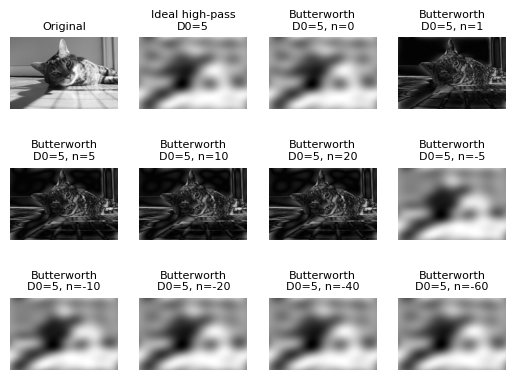

In [ ]:
# Define cutoff frequency for the ideal high-pass filter
cutoff_freq_d0_5 = 5  # Adjust as needed

n_1 = 0
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_5 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_5, n_1)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_5 = fourier_image_shifted * high_pass_filter_high_pass_d0_5

# Shift the result back
filtered_image_high_pass_d0_5 = np.fft.ifftshift(filtered_image_shifted)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_5 = np.fft.ifft2(filtered_image_high_pass_d0_5)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_5 = np.abs(filtered_image_spatial_high_pass_d0_5)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_5 = np.uint8(filtered_image_spatial_high_pass_d0_5)

n_2 = 1
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_5_2 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_5, n_2)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_5_2 = fourier_image_shifted * high_pass_filter_high_pass_d0_5_2

# Shift the result back
filtered_image_high_pass_d0_5_2 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_5_2)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_5_2 = np.fft.ifft2(filtered_image_high_pass_d0_5_2)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_5_2 = np.abs(filtered_image_spatial_high_pass_d0_5_2)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_5_2 = np.uint8(filtered_image_spatial_high_pass_d0_5_2)

n_3 = 5
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_5_3 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_5, n_3)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_5_3 = fourier_image_shifted * high_pass_filter_high_pass_d0_5_3

# Shift the result back
filtered_image_high_pass_d0_5_3 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_5_3)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_5_3 = np.fft.ifft2(filtered_image_high_pass_d0_5_3)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_5_3 = np.abs(filtered_image_spatial_high_pass_d0_5_3)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_5_3 = np.uint8(filtered_image_spatial_high_pass_d0_5_3)

n_4 = 10
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_5_4 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_5, n_4)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_5_4 = fourier_image_shifted * high_pass_filter_high_pass_d0_5_4

# Shift the result back
filtered_image_high_pass_d0_5_4 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_5_4)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_5_4 = np.fft.ifft2(filtered_image_high_pass_d0_5_4)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_5_4 = np.abs(filtered_image_spatial_high_pass_d0_5_4)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_5_4 = np.uint8(filtered_image_spatial_high_pass_d0_5_4)

n_5 = 20
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_5_5 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_5, n_5)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_5_5 = fourier_image_shifted * high_pass_filter_high_pass_d0_5_5

# Shift the result back
filtered_image_high_pass_d0_5_5 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_5_5)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_5_5 = np.fft.ifft2(filtered_image_high_pass_d0_5_5)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_5_5 = np.abs(filtered_image_spatial_high_pass_d0_5_5)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_5_5 = np.uint8(filtered_image_spatial_high_pass_d0_5_5)

n_6 = -5
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_5_6 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_5, n_6)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_5_6 = fourier_image_shifted * high_pass_filter_high_pass_d0_5_6

# Shift the result back
filtered_image_high_pass_d0_5_6 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_5_6)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_5_6 = np.fft.ifft2(filtered_image_high_pass_d0_5_6)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_5_6 = np.abs(filtered_image_spatial_high_pass_d0_5_6)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_5_6 = np.uint8(filtered_image_spatial_high_pass_d0_5_6)

n_7 = -10
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_5_7 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_5, n_6)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_5_7 = fourier_image_shifted * high_pass_filter_high_pass_d0_5_7

# Shift the result back
filtered_image_high_pass_d0_5_7 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_5_7)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_5_7 = np.fft.ifft2(filtered_image_high_pass_d0_5_7)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_5_7 = np.abs(filtered_image_spatial_high_pass_d0_5_7)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_5_7 = np.uint8(filtered_image_spatial_high_pass_d0_5_7)

n_8 = -20
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_5_8 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_5, n_8)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_5_8 = fourier_image_shifted * high_pass_filter_high_pass_d0_5_8

# Shift the result back
filtered_image_high_pass_d0_5_8 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_5_8)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_5_8 = np.fft.ifft2(filtered_image_high_pass_d0_5_8)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_5_8 = np.abs(filtered_image_spatial_high_pass_d0_5_8)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_5_8 = np.uint8(filtered_image_spatial_high_pass_d0_5_8)

n_9 = -40
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_5_9 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_5, n_9)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_5_9 = fourier_image_shifted * high_pass_filter_high_pass_d0_5_9

# Shift the result back
filtered_image_high_pass_d0_5_9 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_5_9)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_5_9 = np.fft.ifft2(filtered_image_high_pass_d0_5_9)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_5_9 = np.abs(filtered_image_spatial_high_pass_d0_5_9)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_5_9 = np.uint8(filtered_image_spatial_high_pass_d0_5_9)

n_10 = -60
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_5_10 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_5, n_10)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_5_10 = fourier_image_shifted * high_pass_filter_high_pass_d0_5_10

# Shift the result back
filtered_image_high_pass_d0_5_10 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_5_10)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_5_10 = np.fft.ifft2(filtered_image_high_pass_d0_5_10)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_5_10 = np.abs(filtered_image_spatial_high_pass_d0_5_10)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_5_10 = np.uint8(filtered_image_spatial_high_pass_d0_5_10)

plt.subplot(3,4,1), plt.imshow(image, cmap='gray')
plt.title('Original', fontsize=8), plt.axis('off')
plt.subplot(3,4,2), plt.imshow(filtered_image_spatial_uint8, cmap='gray')
plt.title('Ideal high-pass\nD0=5', fontsize=8), plt.axis('off')
plt.subplot(3,4,3), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_5, cmap='gray')
plt.title('Butterworth\nD0=5, n=0', fontsize=8), plt.axis('off')
plt.subplot(3,4,4), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_5_2, cmap='gray')
plt.title('Butterworth\nD0=5, n=1', fontsize=8), plt.axis('off')
plt.subplot(3,4,5), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_5_3, cmap='gray')
plt.title('Butterworth\nD0=5, n=5', fontsize=8), plt.axis('off')
plt.subplot(3,4,6), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_5_4, cmap='gray')
plt.title('Butterworth\nD0=5, n=10', fontsize=8), plt.axis('off')
plt.subplot(3,4,7), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_5_5, cmap='gray')
plt.title('Butterworth\nD0=5, n=20', fontsize=8), plt.axis('off')
plt.subplot(3,4,8), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_5_6, cmap='gray')
plt.title('Butterworth\nD0=5, n=-5', fontsize=8), plt.axis('off')
plt.subplot(3,4,9), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_5_7, cmap='gray')
plt.title('Butterworth\nD0=5, n=-10', fontsize=8), plt.axis('off')
plt.subplot(3,4,10), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_5_8, cmap='gray')
plt.title('Butterworth\nD0=5, n=-20', fontsize=8), plt.axis('off')
plt.subplot(3,4,11), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_5_9, cmap='gray')
plt.title('Butterworth\nD0=5, n=-40', fontsize=8), plt.axis('off')
plt.subplot(3,4,12), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_5_10, cmap='gray')
plt.title('Butterworth\nD0=5, n=-60', fontsize=8), plt.axis('off')
plt.show()

#Jika distance=0 dan n=negatif, bisa terjadi pembagian dengan 0

D0=10

<ipython-input-30-ec9388031983>:9: RuntimeWarning: divide by zero encountered in scalar divide
  mask[i, j] = 1 / (1 + (cutoff_freq / distance)**(2 * n))


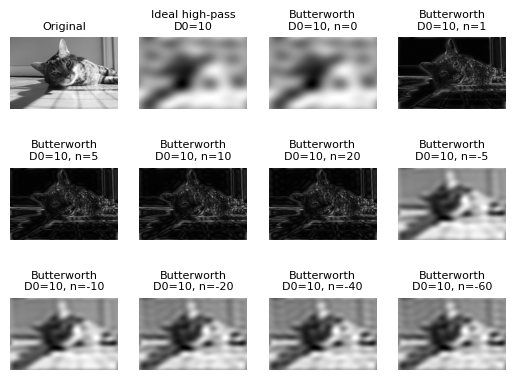

In [ ]:
# Define cutoff frequency for the ideal high-pass filter
cutoff_freq_d0_10 = 10  # Adjust as needed

n_1 = 0
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_10 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_10, n_1)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_10 = fourier_image_shifted * high_pass_filter_high_pass_d0_10

# Shift the result back
filtered_image_high_pass_d0_10 = np.fft.ifftshift(filtered_image_shifted)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_10 = np.fft.ifft2(filtered_image_high_pass_d0_10)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_10 = np.abs(filtered_image_spatial_high_pass_d0_10)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_10 = np.uint8(filtered_image_spatial_high_pass_d0_10)

n_2 = 1
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_10_2 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_10, n_2)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_10_2 = fourier_image_shifted * high_pass_filter_high_pass_d0_10_2

# Shift the result back
filtered_image_high_pass_d0_10_2 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_10_2)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_10_2 = np.fft.ifft2(filtered_image_high_pass_d0_10_2)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_10_2 = np.abs(filtered_image_spatial_high_pass_d0_10_2)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_10_2 = np.uint8(filtered_image_spatial_high_pass_d0_10_2)

n_3 = 5
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_10_3 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_10, n_3)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_10_3 = fourier_image_shifted * high_pass_filter_high_pass_d0_10_3

# Shift the result back
filtered_image_high_pass_d0_10_3 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_10_3)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_10_3 = np.fft.ifft2(filtered_image_high_pass_d0_10_3)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_10_3 = np.abs(filtered_image_spatial_high_pass_d0_10_3)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_10_3 = np.uint8(filtered_image_spatial_high_pass_d0_10_3)

n_4 = 10
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_10_4 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_10, n_4)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_10_4 = fourier_image_shifted * high_pass_filter_high_pass_d0_10_4

# Shift the result back
filtered_image_high_pass_d0_10_4 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_10_4)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_10_4 = np.fft.ifft2(filtered_image_high_pass_d0_10_4)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_10_4 = np.abs(filtered_image_spatial_high_pass_d0_10_4)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_10_4 = np.uint8(filtered_image_spatial_high_pass_d0_10_4)

n_5 = 20
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_10_5 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_10, n_5)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_10_5 = fourier_image_shifted * high_pass_filter_high_pass_d0_10_5

# Shift the result back
filtered_image_high_pass_d0_10_5 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_10_5)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_10_5 = np.fft.ifft2(filtered_image_high_pass_d0_10_5)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_10_5 = np.abs(filtered_image_spatial_high_pass_d0_10_5)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_10_5 = np.uint8(filtered_image_spatial_high_pass_d0_10_5)

n_6 = -5
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_10_6 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_10, n_6)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_10_6 = fourier_image_shifted * high_pass_filter_high_pass_d0_10_6

# Shift the result back
filtered_image_high_pass_d0_10_6 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_10_6)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_10_6 = np.fft.ifft2(filtered_image_high_pass_d0_10_6)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_10_6 = np.abs(filtered_image_spatial_high_pass_d0_10_6)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_10_6 = np.uint8(filtered_image_spatial_high_pass_d0_10_6)

n_7 = -10
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_10_7 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_10, n_6)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_10_7 = fourier_image_shifted * high_pass_filter_high_pass_d0_10_7

# Shift the result back
filtered_image_high_pass_d0_10_7 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_10_7)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_10_7 = np.fft.ifft2(filtered_image_high_pass_d0_10_7)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_10_7 = np.abs(filtered_image_spatial_high_pass_d0_10_7)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_10_7 = np.uint8(filtered_image_spatial_high_pass_d0_10_7)

n_8 = -20
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_10_8 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_10, n_8)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_10_8 = fourier_image_shifted * high_pass_filter_high_pass_d0_10_8

# Shift the result back
filtered_image_high_pass_d0_10_8 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_10_8)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_10_8 = np.fft.ifft2(filtered_image_high_pass_d0_10_8)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_10_8 = np.abs(filtered_image_spatial_high_pass_d0_10_8)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_10_8 = np.uint8(filtered_image_spatial_high_pass_d0_10_8)

n_9 = -40
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_10_9 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_10, n_9)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_10_9 = fourier_image_shifted * high_pass_filter_high_pass_d0_10_9

# Shift the result back
filtered_image_high_pass_d0_10_9 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_10_9)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_10_9 = np.fft.ifft2(filtered_image_high_pass_d0_10_9)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_10_9 = np.abs(filtered_image_spatial_high_pass_d0_10_9)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_10_9 = np.uint8(filtered_image_spatial_high_pass_d0_10_9)

n_10 = -60
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_10_10 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_10, n_10)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_10_10 = fourier_image_shifted * high_pass_filter_high_pass_d0_10_10

# Shift the result back
filtered_image_high_pass_d0_10_10 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_10_10)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_10_10 = np.fft.ifft2(filtered_image_high_pass_d0_10_10)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_10_10 = np.abs(filtered_image_spatial_high_pass_d0_10_10)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_10_10 = np.uint8(filtered_image_spatial_high_pass_d0_10_10)

plt.subplot(3,4,1), plt.imshow(image, cmap='gray')
plt.title('Original', fontsize=8), plt.axis('off')
plt.subplot(3,4,2), plt.imshow(filtered_image_spatial_uint8, cmap='gray')
plt.title('Ideal high-pass\nD0=10', fontsize=8), plt.axis('off')
plt.subplot(3,4,3), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_10, cmap='gray')
plt.title('Butterworth\nD0=10, n=0', fontsize=8), plt.axis('off')
plt.subplot(3,4,4), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_10_2, cmap='gray')
plt.title('Butterworth\nD0=10, n=1', fontsize=8), plt.axis('off')
plt.subplot(3,4,5), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_10_3, cmap='gray')
plt.title('Butterworth\nD0=10, n=5', fontsize=8), plt.axis('off')
plt.subplot(3,4,6), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_10_4, cmap='gray')
plt.title('Butterworth\nD0=10, n=10', fontsize=8), plt.axis('off')
plt.subplot(3,4,7), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_10_5, cmap='gray')
plt.title('Butterworth\nD0=10, n=20', fontsize=8), plt.axis('off')
plt.subplot(3,4,8), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_10_6, cmap='gray')
plt.title('Butterworth\nD0=10, n=-5', fontsize=8), plt.axis('off')
plt.subplot(3,4,9), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_10_7, cmap='gray')
plt.title('Butterworth\nD0=10, n=-10', fontsize=8), plt.axis('off')
plt.subplot(3,4,10), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_10_8, cmap='gray')
plt.title('Butterworth\nD0=10, n=-20', fontsize=8), plt.axis('off')
plt.subplot(3,4,11), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_10_9, cmap='gray')
plt.title('Butterworth\nD0=10, n=-40', fontsize=8), plt.axis('off')
plt.subplot(3,4,12), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_10_10, cmap='gray')
plt.title('Butterworth\nD0=10, n=-60', fontsize=8), plt.axis('off')
plt.show()

#Jika distance=0 dan n=negatif, bisa terjadi pembagian dengan 0

D0=20

<ipython-input-30-ec9388031983>:9: RuntimeWarning: divide by zero encountered in scalar divide
  mask[i, j] = 1 / (1 + (cutoff_freq / distance)**(2 * n))


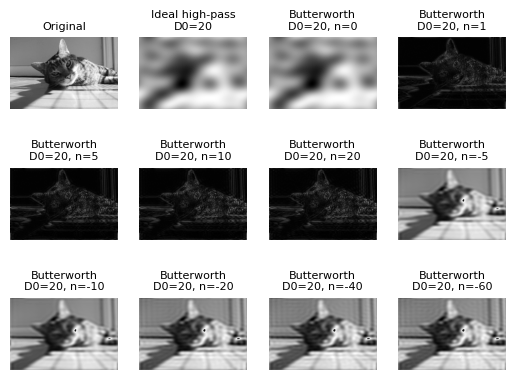

In [ ]:
# Define cutoff frequency for the ideal high-pass filter
cutoff_freq_d0_20 = 20  # Adjust as needed

n_1 = 0
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_20 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_20, n_1)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_20 = fourier_image_shifted * high_pass_filter_high_pass_d0_20

# Shift the result back
filtered_image_high_pass_d0_20 = np.fft.ifftshift(filtered_image_shifted)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_20 = np.fft.ifft2(filtered_image_high_pass_d0_20)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_20 = np.abs(filtered_image_spatial_high_pass_d0_20)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_20 = np.uint8(filtered_image_spatial_high_pass_d0_20)

n_2 = 1
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_20_2 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_20, n_2)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_20_2 = fourier_image_shifted * high_pass_filter_high_pass_d0_20_2

# Shift the result back
filtered_image_high_pass_d0_20_2 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_20_2)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_20_2 = np.fft.ifft2(filtered_image_high_pass_d0_20_2)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_20_2 = np.abs(filtered_image_spatial_high_pass_d0_20_2)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_20_2 = np.uint8(filtered_image_spatial_high_pass_d0_20_2)

n_3 = 5
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_20_3 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_20, n_3)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_20_3 = fourier_image_shifted * high_pass_filter_high_pass_d0_20_3

# Shift the result back
filtered_image_high_pass_d0_20_3 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_20_3)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_20_3 = np.fft.ifft2(filtered_image_high_pass_d0_20_3)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_20_3 = np.abs(filtered_image_spatial_high_pass_d0_20_3)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_20_3 = np.uint8(filtered_image_spatial_high_pass_d0_20_3)

n_4 = 10
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_20_4 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_20, n_4)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_20_4 = fourier_image_shifted * high_pass_filter_high_pass_d0_20_4

# Shift the result back
filtered_image_high_pass_d0_20_4 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_20_4)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_20_4 = np.fft.ifft2(filtered_image_high_pass_d0_20_4)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_20_4 = np.abs(filtered_image_spatial_high_pass_d0_20_4)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_20_4 = np.uint8(filtered_image_spatial_high_pass_d0_20_4)

n_5 = 20
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_20_5 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_20, n_5)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_20_5 = fourier_image_shifted * high_pass_filter_high_pass_d0_20_5

# Shift the result back
filtered_image_high_pass_d0_20_5 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_20_5)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_20_5 = np.fft.ifft2(filtered_image_high_pass_d0_20_5)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_20_5 = np.abs(filtered_image_spatial_high_pass_d0_20_5)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_20_5 = np.uint8(filtered_image_spatial_high_pass_d0_20_5)

n_6 = -5
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_20_6 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_20, n_6)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_20_6 = fourier_image_shifted * high_pass_filter_high_pass_d0_20_6

# Shift the result back
filtered_image_high_pass_d0_20_6 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_20_6)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_20_6 = np.fft.ifft2(filtered_image_high_pass_d0_20_6)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_20_6 = np.abs(filtered_image_spatial_high_pass_d0_20_6)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_20_6 = np.uint8(filtered_image_spatial_high_pass_d0_20_6)

n_7 = -10
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_20_7 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_20, n_6)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_20_7 = fourier_image_shifted * high_pass_filter_high_pass_d0_20_7

# Shift the result back
filtered_image_high_pass_d0_20_7 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_20_7)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_20_7 = np.fft.ifft2(filtered_image_high_pass_d0_20_7)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_20_7 = np.abs(filtered_image_spatial_high_pass_d0_20_7)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_20_7 = np.uint8(filtered_image_spatial_high_pass_d0_20_7)

n_8 = -20
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_20_8 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_20, n_8)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_20_8 = fourier_image_shifted * high_pass_filter_high_pass_d0_20_8

# Shift the result back
filtered_image_high_pass_d0_20_8 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_20_8)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_20_8 = np.fft.ifft2(filtered_image_high_pass_d0_20_8)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_20_8 = np.abs(filtered_image_spatial_high_pass_d0_20_8)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_20_8 = np.uint8(filtered_image_spatial_high_pass_d0_20_8)

n_9 = -40
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_20_9 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_20, n_9)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_20_9 = fourier_image_shifted * high_pass_filter_high_pass_d0_20_9

# Shift the result back
filtered_image_high_pass_d0_20_9 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_20_9)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_20_9 = np.fft.ifft2(filtered_image_high_pass_d0_20_9)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_20_9 = np.abs(filtered_image_spatial_high_pass_d0_20_9)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_20_9 = np.uint8(filtered_image_spatial_high_pass_d0_20_9)

n_10 = -60
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_20_10 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_20, n_10)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_20_10 = fourier_image_shifted * high_pass_filter_high_pass_d0_20_10

# Shift the result back
filtered_image_high_pass_d0_20_10 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_20_10)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_20_10 = np.fft.ifft2(filtered_image_high_pass_d0_20_10)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_20_10 = np.abs(filtered_image_spatial_high_pass_d0_20_10)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_20_10 = np.uint8(filtered_image_spatial_high_pass_d0_20_10)

plt.subplot(3,4,1), plt.imshow(image, cmap='gray')
plt.title('Original', fontsize=8), plt.axis('off')
plt.subplot(3,4,2), plt.imshow(filtered_image_spatial_uint8, cmap='gray')
plt.title('Ideal high-pass\nD0=20', fontsize=8), plt.axis('off')
plt.subplot(3,4,3), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_20, cmap='gray')
plt.title('Butterworth\nD0=20, n=0', fontsize=8), plt.axis('off')
plt.subplot(3,4,4), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_20_2, cmap='gray')
plt.title('Butterworth\nD0=20, n=1', fontsize=8), plt.axis('off')
plt.subplot(3,4,5), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_20_3, cmap='gray')
plt.title('Butterworth\nD0=20, n=5', fontsize=8), plt.axis('off')
plt.subplot(3,4,6), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_20_4, cmap='gray')
plt.title('Butterworth\nD0=20, n=10', fontsize=8), plt.axis('off')
plt.subplot(3,4,7), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_20_5, cmap='gray')
plt.title('Butterworth\nD0=20, n=20', fontsize=8), plt.axis('off')
plt.subplot(3,4,8), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_20_6, cmap='gray')
plt.title('Butterworth\nD0=20, n=-5', fontsize=8), plt.axis('off')
plt.subplot(3,4,9), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_20_7, cmap='gray')
plt.title('Butterworth\nD0=20, n=-10', fontsize=8), plt.axis('off')
plt.subplot(3,4,10), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_20_8, cmap='gray')
plt.title('Butterworth\nD0=20, n=-20', fontsize=8), plt.axis('off')
plt.subplot(3,4,11), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_20_9, cmap='gray')
plt.title('Butterworth\nD0=20, n=-40', fontsize=8), plt.axis('off')
plt.subplot(3,4,12), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_20_10, cmap='gray')
plt.title('Butterworth\nD0=20, n=-60', fontsize=8), plt.axis('off')
plt.show()

#Jika distance=0 dan n=negatif, bisa terjadi pembagian dengan 0

D0=40

<ipython-input-30-ec9388031983>:9: RuntimeWarning: divide by zero encountered in scalar divide
  mask[i, j] = 1 / (1 + (cutoff_freq / distance)**(2 * n))


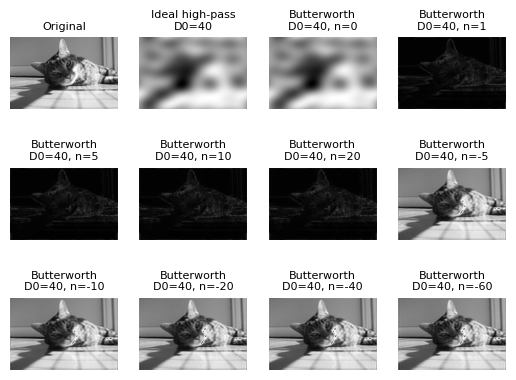

In [ ]:
# Define cutoff frequency for the ideal high-pass filter
cutoff_freq_d0_40 = 40  # Adjust as needed

n_1 = 0
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_40 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_40, n_1)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_40 = fourier_image_shifted * high_pass_filter_high_pass_d0_40

# Shift the result back
filtered_image_high_pass_d0_40 = np.fft.ifftshift(filtered_image_shifted)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_40 = np.fft.ifft2(filtered_image_high_pass_d0_40)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_40 = np.abs(filtered_image_spatial_high_pass_d0_40)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_40 = np.uint8(filtered_image_spatial_high_pass_d0_40)

n_2 = 1
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_40_2 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_40, n_2)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_40_2 = fourier_image_shifted * high_pass_filter_high_pass_d0_40_2

# Shift the result back
filtered_image_high_pass_d0_40_2 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_40_2)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_40_2 = np.fft.ifft2(filtered_image_high_pass_d0_40_2)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_40_2 = np.abs(filtered_image_spatial_high_pass_d0_40_2)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_40_2 = np.uint8(filtered_image_spatial_high_pass_d0_40_2)

n_3 = 5
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_40_3 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_40, n_3)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_40_3 = fourier_image_shifted * high_pass_filter_high_pass_d0_40_3

# Shift the result back
filtered_image_high_pass_d0_40_3 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_40_3)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_40_3 = np.fft.ifft2(filtered_image_high_pass_d0_40_3)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_40_3 = np.abs(filtered_image_spatial_high_pass_d0_40_3)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_40_3 = np.uint8(filtered_image_spatial_high_pass_d0_40_3)

n_4 = 10
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_40_4 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_40, n_4)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_40_4 = fourier_image_shifted * high_pass_filter_high_pass_d0_40_4

# Shift the result back
filtered_image_high_pass_d0_40_4 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_40_4)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_40_4 = np.fft.ifft2(filtered_image_high_pass_d0_40_4)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_40_4 = np.abs(filtered_image_spatial_high_pass_d0_40_4)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_40_4 = np.uint8(filtered_image_spatial_high_pass_d0_40_4)

n_5 = 20
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_40_5 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_40, n_5)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_40_5 = fourier_image_shifted * high_pass_filter_high_pass_d0_40_5

# Shift the result back
filtered_image_high_pass_d0_40_5 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_40_5)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_40_5 = np.fft.ifft2(filtered_image_high_pass_d0_40_5)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_40_5 = np.abs(filtered_image_spatial_high_pass_d0_40_5)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_40_5 = np.uint8(filtered_image_spatial_high_pass_d0_40_5)

n_6 = -5
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_40_6 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_40, n_6)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_40_6 = fourier_image_shifted * high_pass_filter_high_pass_d0_40_6

# Shift the result back
filtered_image_high_pass_d0_40_6 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_40_6)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_40_6 = np.fft.ifft2(filtered_image_high_pass_d0_40_6)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_40_6 = np.abs(filtered_image_spatial_high_pass_d0_40_6)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_40_6 = np.uint8(filtered_image_spatial_high_pass_d0_40_6)

n_7 = -10
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_40_7 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_40, n_6)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_40_7 = fourier_image_shifted * high_pass_filter_high_pass_d0_40_7

# Shift the result back
filtered_image_high_pass_d0_40_7 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_40_7)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_40_7 = np.fft.ifft2(filtered_image_high_pass_d0_40_7)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_40_7 = np.abs(filtered_image_spatial_high_pass_d0_40_7)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_40_7 = np.uint8(filtered_image_spatial_high_pass_d0_40_7)

n_8 = -20
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_40_8 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_40, n_8)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_40_8 = fourier_image_shifted * high_pass_filter_high_pass_d0_40_8

# Shift the result back
filtered_image_high_pass_d0_40_8 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_40_8)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_40_8 = np.fft.ifft2(filtered_image_high_pass_d0_40_8)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_40_8 = np.abs(filtered_image_spatial_high_pass_d0_40_8)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_40_8 = np.uint8(filtered_image_spatial_high_pass_d0_40_8)

n_9 = -40
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_40_9 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_40, n_9)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_40_9 = fourier_image_shifted * high_pass_filter_high_pass_d0_40_9

# Shift the result back
filtered_image_high_pass_d0_40_9 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_40_9)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_40_9 = np.fft.ifft2(filtered_image_high_pass_d0_40_9)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_40_9 = np.abs(filtered_image_spatial_high_pass_d0_40_9)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_40_9 = np.uint8(filtered_image_spatial_high_pass_d0_40_9)

n_10 = -60
# Generate ideal high-pass filter mask
high_pass_filter_high_pass_d0_40_10 = butterworth_high_pass_filter(rows, cols, cutoff_freq_d0_40, n_10)
# Apply the filter in the frequency domain
filtered_image_shifted_high_pass_d0_40_10 = fourier_image_shifted * high_pass_filter_high_pass_d0_40_10

# Shift the result back
filtered_image_high_pass_d0_40_10 = np.fft.ifftshift(filtered_image_shifted_high_pass_d0_40_10)
# Convert back to spatial domain
filtered_image_spatial_high_pass_d0_40_10 = np.fft.ifft2(filtered_image_high_pass_d0_40_10)
# Take the magnitude of the complex result to get the filtered image
filtered_image_spatial_high_pass_d0_40_10 = np.abs(filtered_image_spatial_high_pass_d0_40_10)
# Convert back to uint8 (required for displaying)
filtered_image_spatial_uint8_high_pass_d0_40_10 = np.uint8(filtered_image_spatial_high_pass_d0_40_10)

plt.subplot(3,4,1), plt.imshow(image, cmap='gray')
plt.title('Original', fontsize=8), plt.axis('off')
plt.subplot(3,4,2), plt.imshow(filtered_image_spatial_uint8, cmap='gray')
plt.title('Ideal high-pass\nD0=40', fontsize=8), plt.axis('off')
plt.subplot(3,4,3), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_40, cmap='gray')
plt.title('Butterworth\nD0=40, n=0', fontsize=8), plt.axis('off')
plt.subplot(3,4,4), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_40_2, cmap='gray')
plt.title('Butterworth\nD0=40, n=1', fontsize=8), plt.axis('off')
plt.subplot(3,4,5), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_40_3, cmap='gray')
plt.title('Butterworth\nD0=40, n=5', fontsize=8), plt.axis('off')
plt.subplot(3,4,6), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_40_4, cmap='gray')
plt.title('Butterworth\nD0=40, n=10', fontsize=8), plt.axis('off')
plt.subplot(3,4,7), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_40_5, cmap='gray')
plt.title('Butterworth\nD0=40, n=20', fontsize=8), plt.axis('off')
plt.subplot(3,4,8), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_40_6, cmap='gray')
plt.title('Butterworth\nD0=40, n=-5', fontsize=8), plt.axis('off')
plt.subplot(3,4,9), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_40_7, cmap='gray')
plt.title('Butterworth\nD0=40, n=-10', fontsize=8), plt.axis('off')
plt.subplot(3,4,10), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_40_8, cmap='gray')
plt.title('Butterworth\nD0=40, n=-20', fontsize=8), plt.axis('off')
plt.subplot(3,4,11), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_40_9, cmap='gray')
plt.title('Butterworth\nD0=40, n=-40', fontsize=8), plt.axis('off')
plt.subplot(3,4,12), plt.imshow(filtered_image_spatial_uint8_high_pass_d0_40_10, cmap='gray')
plt.title('Butterworth\nD0=40, n=-60', fontsize=8), plt.axis('off')
plt.show()

#Jika distance=0 dan n=negatif, bisa terjadi pembagian dengan 0